# Project 2 : An analysis of paleo-present climate data

This jupyter notebook contains the second project for the programming and data analytics module  
***

## Index  

1. Objetives
2. Used technologies
3. Theme of the project
4. import database
5. Analysis
6. Conclusions
7. References  

***

## Objetives  

1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.  
2. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)  
3. Examine Irish context:  
  o Climate change signals: (see Maynooth study: The emergence of a climate change  
  signal in long-term Irish meteorological observations - ScienceDirect)  
4. Fuse and analyse data from various data sources and format fused data set as a pandas  
  dataframe and export to csv and json formats.  
5. For all of the above variables, analyse the data, the trends and the relationships between  
  them (temporal leads/lags/frequency analysis).  
6. Predict global temperature anomaly over next few decades (synthesise data) and compare to  
  published climate models if atmospheric CO2 trends continue  
7. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)  


***
## Used technologies  

**Numpy**  
Is used for numerical computation that allows you to work with large, multi-dimensional arrays and matrices of numerical data.  
It provides a wide range of mathematical functions to operate on these arrays, making it an essential tool for scientific computing, data analysis, and machine learning.  
To find out more:  
https://numpy.org/  

**Pandas**  
Is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. https://pandas.pydata.org/  

**Matplotlib**  
Is a plotting library for the Python programming language that provides a wide variety of high-quality 2D and 3D graphs and plots.
More of this:
https://matplotlib.org/

**Seaborn**  
Is a data visualization library in Python built on top of Matplotlib.
It provides a high-level interface for creating informative and statistical graphics.
https://seaborn.pydata.org/

**Scikit-learn**  
Offers a wide range of statistical and mathematical tools that operate on NumPy arrays. It includes functions for descriptive statistics, statistical tests, probability distributions, among others.  
https://scikit-learn.org/stable/  

**openpyxl**  
A python library to read/write excel 2010 xlsx/xlsm files  
https://openpyxl.readthedocs.io/en/stable/


In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  
import openpyxl

***

## Theme of the project  

The theme of the project is a brief analysis and review of a study presented in 2008 in the journal Nature in 2008 [1]. This study analyzed Antarctic ice cores to reconstruct past atmospheric carbon dioxide (CO2) levels.

Lüthi and his team used ice cores to examine how CO2 levels have varied over hundreds of thousands of years.  
Their findings revealed a significant relationship between changes in CO2 levels and temperature variations over past climate periods.  
They showed that changes in CO2 levels were closely related to changes in global temperature, supporting the idea that CO2 is an important driver of climate change.

This study provided valuable insight into how CO2 levels have fluctuated over Earth's history and how these changes have influenced climatic conditions.

CO2 emissions from fossil fuels have increased since the industrial revolution (i.e., since the mid-1700s) and, by the 1950s, the atmospheric concentration of CO2 had risen from 284 parts per million (ppm) to 300 ppm above pre-industrial levels, the highest level in at least 800,000 years (Luthi et al., 2008).[2]

For this study there were several limitations, such as the availability or accuracy of the data, since it covers a period of tens of thousands of years, but a series of conclusions were drawn that are intended to be replicated in the present project.


***

## Import database

In order to see this correlation between CO2 and temperature,several databases that collect this information will be used.  
All the databases used are located in the data subfolder.  

First of all, the necessary transformations must be established to obtain the information we need and from there,  
start the analysis, obtain conclusions and be able to visualize it in order to have a better understanding of the results obtained.  

The following databases are used for the project:

1) **Temp Data from Jouzel**  
     This file authored by French climate laureate Jean Jouzel shows how a detailed analysis of a specific ice core  
     in Antarctica reveals crucial information about past climatic changes, especially in relation to temperature. [3]  

2) **CO2 data from IPCC Report**  
     This provides the following: Composite of atmospheric CO2 records from Antarctic ice cores. [4]  
     This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.  

3) **Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)**  
     This dataset, called AICC2012, provides information from an Antarctic ice core chronology. 

4) **A fourth iris database** related to objective item 3. The aim is to find a phenomenon that can be related to the previous ones.  
   It can be found at the following link:  
   https://www.met.ie/climate/available-data/long-term-data-sets/  

5) **Nasa db temperature and co2** is a is a more current database containing data on co2 and temperature variation.

***

## Analysis

### Temperature vs CO2

In [2]:
# Read data from the Temp Data from Jozuel [5]
temp_file_path = "data\Temp Data from Jouzel.xls" 
temp_df = pd.read_excel(temp_file_path)  
temp_df.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453


We obtain different values from this dataset, of which we are interested in the estimated temperature measured in farenheit and the EDC3beta.  
This will allow us to see the evolution of the temperature over time by displaying a graph.  
The graph also shows a red trend line for this temperature increase.

In [3]:
# Extracting column 3 (EDC3 age scale) and column 5 (Temperature estimate)  
edc3_age = temp_df["EDC3béta"]
temp_estimate = temp_df["temp"]

In [4]:
# Fitting a trend line [6]
coefficients = np.polyfit(edc3_age, temp_estimate, 1)
trendline = np.polyval(coefficients, edc3_age)

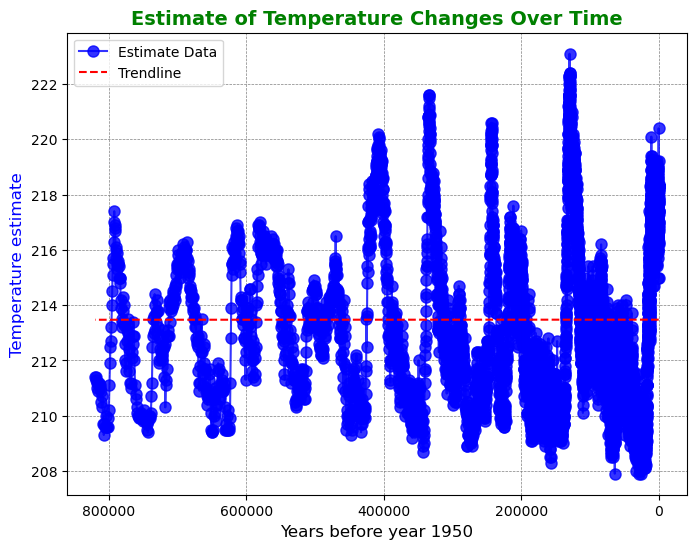

In [5]:
# Plot with data and trendline
plt.figure(figsize=(8, 6))
plt.plot(edc3_age, temp_estimate, marker="o", linestyle="-", color="blue", markersize=8, label="Estimate Data", alpha=0.8)
plt.plot(edc3_age, trendline, color='red', linestyle='--', label='Trendline')
plt.xlabel("Years before year 1950", fontsize=12,)
plt.ylabel("Temperature estimate", fontsize=12, color="blue")
plt.title("Estimate of Temperature Changes Over Time", fontweight="bold", fontsize=14, color="green")
plt.grid(True, linestyle="--", linewidth=0.5, color="gray")
plt.legend()
plt.gca().invert_xaxis() # Invert the x axis [7]
plt.show()

In [6]:
# Calculate the mean temperature
temp_mean = temp_df["temp"].mean()

# Display the mean temperature
print("The mean temperature is:", temp_mean)

The mean temperature is: 213.4747207423956


The graph shows an oscillatory behavior with 5 peaks that stand out from the general trend in the graph.    
The mean behaves the same as the trend line.
After analyzing the temperature, let us move on to analyze CO2.

In [7]:
# Read data from CO2 data from IPCC Report
co2_file_path = "data\CO2 data from IPCC Report.xls"
co2_df = pd.read_excel(co2_file_path,sheet_name=2,skiprows=14)  
co2_df.head()

,year,CO2,sigma mean CO2
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007


1) CO2 (ppmv): This column probably represents the actual concentration of carbon dioxide in parts per million at a specific point in time or over a given period. These values are the actual or estimated measurements of CO2.  

2) Sigma mean CO2 (ppmv): This column, on the other hand, could represent the uncertainty or standard deviation of average CO2 measurements.  
In science and statistics, "sigma" generally refers to standard deviation, which is a measure of how much values vary in a data set.  

3) year indicates the age or time elapsed from a specific gas sample to the present.  

In [8]:
# Extracting column 1 (year) and column 2 (C02)  
gas_year = co2_df["year"]
CO2_values = co2_df["CO2"]

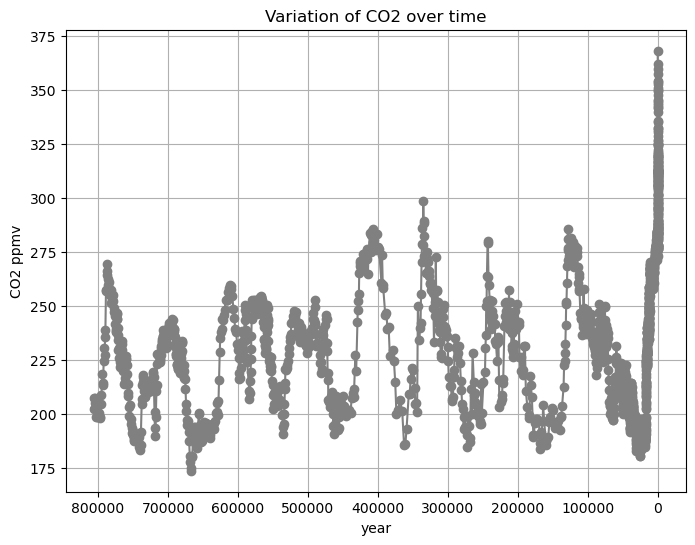

In [9]:
# Plot C02
plt.figure(figsize=(8, 6))
plt.plot(gas_year, CO2_values, marker="o", linestyle="-", color="gray")
plt.xlabel("year")
plt.ylabel("CO2 ppmv")
plt.title("Variation of CO2 over time")
plt.grid(True)
plt.gca().invert_xaxis() 
plt.show()

As can be seen in this graph, CO2 for tens of thousands of years has been oscillating between 275 ppmv and 200 ppmv until the irruption of the human being and the industrial revolution, where the ppmv skyrockets.

Once seen the evolution of co2 and temperature,analyse CO2 vs Temperature Anomaly from 800kyrs - present.

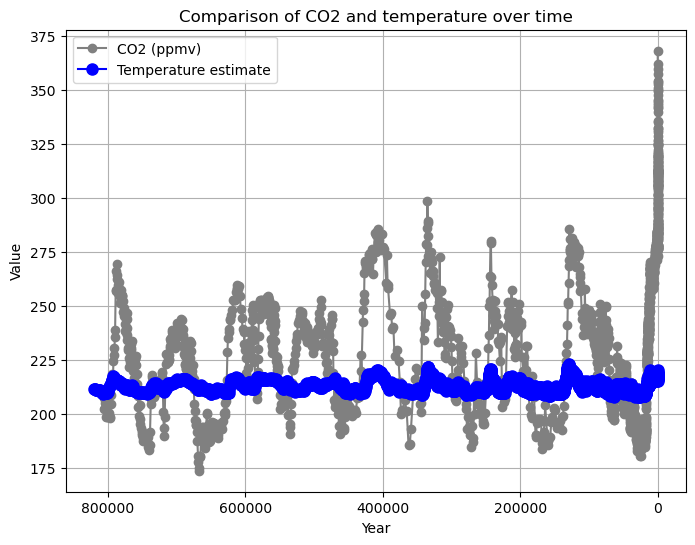

In [10]:
plt.figure(figsize=(8, 6))

# plot CO2
plt.plot(gas_year, CO2_values, marker="o", linestyle="-", color="gray", label="CO2 (ppmv)")

# Plot temperature
plt.plot(edc3_age, temp_estimate, marker="o", linestyle="-", color="blue", markersize=8, label="Temperature estimate")

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Comparison of CO2 and temperature over time")
plt.grid(True)
plt.legend()
plt.gca().invert_xaxis() 
plt.show()

While CO2 increased almost exponentially, such drastic changes in temperature are hardly noticeable.

### Examine one other (paleo/modern) features: ice accumulation

For this section, the official webs page where the database is located is as follows :  
https://www.ncei.noaa.gov/access/paleo-search/  

The page belongs to the organization called : National Centers for Environmental Information , which is a United States organization.  


NCEI provides environmental data, products, and services covering the depths of the ocean to the surface of the sun to drive resilience, prosperity, and equity for current and future generations.  

The chosen dataset called AICC2012 [8], provides information from a chronology of Antarctic ice cores.  

The dataset contains the following elements:

1) Time Period -805991 to 2005  

2) Coverage Description	Date Range: 807941 cal yr BP to -55 cal yr BP  

3) The AICC2012 chronology is a common and precise chronology for Vostok, EDC, EDML, TALDICE and NGRIP ice core.
    For each core data include Depth, ice age, gas age (and their uncertainties), the accumulation rate, the thinning function, 
    and the Lock-in depth in ice equivalent (LIDIE). The new age scale is tuned to GICC05 over the last 60 ka.
    The "-1" here is equivalent to "NaN"

In [11]:
# Read data from AICC2012 800KYr Antarctic Ice Core Chronology
ice_file_path = "data\AICC2012 800KYr Antarctic Ice Core Chronology.xlsx"
ice_df = pd.read_excel(ice_file_path,sheet_name=1)  
ice_df.head()

,depth_m,age_calBPice,age_calBPiceerr,age_calBPgas,age_calBPgaserr,ice_accum_mie,thinfunc,LIDIE
0,0.00,-55.00,22.44,-1.0,-1.0,0.0291,0.9948,-1.0
1,1.65,-41.54,32.03,-1.0,-1.0,0.0291,0.9945,-1.0
2,3.30,-20.47,63.21,-1.0,-1.0,0.0292,0.9942,-1.0
3,4.95,4.30,81.82,-1.0,-1.0,0.0293,0.9941,-1.0
4,6.60,31.06,90.52,-1.0,-1.0,0.0290,0.9941,-1.0


The explanation of each variable is the following:  

1) **depth_m**: Represents the depth in an ice core, usually measured in meters. In the context of an ice core, it indicates at what depth a specific sample was taken within the ice.

2) **age_calBPice**: The age of the ice expressed in years before the present (BP), using a calibrated calendar. It indicates the age of the ice sample in relation to the current time.

3) **age_calBPiceerr**: This variable represents the error associated with estimating the age of the ice. It provides information about the uncertainty or margin of error in the estimation of ice age.

4) **age_calBPgas**: Similar to "age_calBPice," but it refers to the age of the gas contained in the ice core rather than the age of the ice itself.

5) **age_calBPgaserr**: Like "age_calBPiceerr," this variable represents the error or uncertainty associated with estimating the age of the gas in the ice core.

6) **ice_accum_mie**: Indicates the ice accumulation rate, i.e., the speed at which ice accumulates at the location where the core was extracted. It is typically measured in meters of ice equivalent per unit of time.

7) **thinfunc**: Represents the ice thinning function. This function describes how the ice thins or changes in density with respect to depth.

8) **LIDIE**: Stands for Lock-in Depth in Ice Equivalent (LIDIE). It indicates the depth to which certain ice properties are locked or preserved.

To make a Python plot that relates time to ice accumulation rate 2 variables must be extracted from the original data frame:

1) CalBPice for time

2) ice_accum_nie for ice accumulation

In [12]:
# Extract CaLBPice and ice accumulation from ice_df
years = ice_df["age_calBPice"]  
ice_accum = ice_df["ice_accum_mie"]  

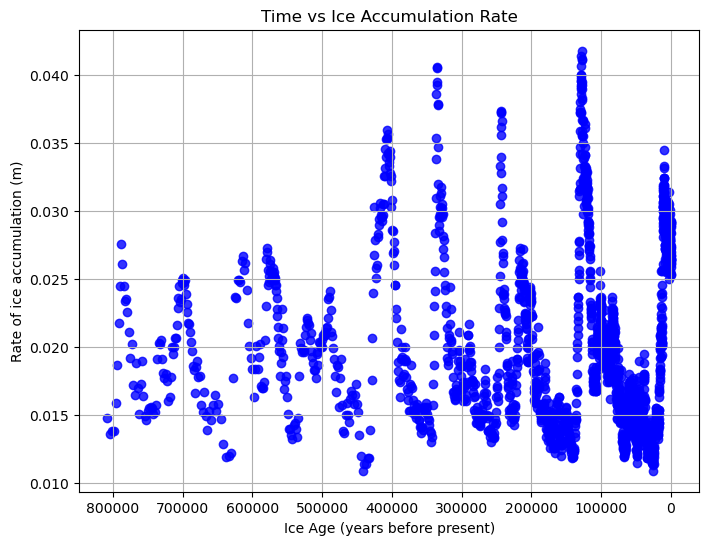

In [13]:
# Time vs. rate of ice accumulation plot
plt.figure(figsize=(8, 6))
plt.scatter(years, ice_accum, c="blue", alpha=0.8)
plt.xlabel("Ice Age (years before present)")
plt.ylabel("Rate of ice accumulation (m)")
plt.title("Time vs Ice Accumulation Rate")
plt.grid(True)
plt.gca().invert_xaxis() 
plt.show()

The plot suggests that ice accumulation has been oscillating since records have been kept.  
There have been different ice ages that have conditioned the amount of ice and the thickness of the ice cores.

### Irish context  

**Rainfall time series from 1850-2010 for Ireland.**  

An Island of Ireland Precipitation (IIP) series covering the period 1850-2010 for 25 locations has been constructed by researchers at Maynooth University and Met Éireann. [9]  
Analysis of homogenized and extended precipitation records reveals both positive (winter) and negative (summer) trends.  

To see this rainfall phenomenon, a national measurement of the island is chosen(IIP_National series.csv).

This is a data set showing the average monthly precipitation in the national precipitation series for the Island of Ireland (IIP).  
The table contains monthly average precipitation values for each year from 1850 to a certain point in time. Each row represents a year, and the columns correspond to the months of the year, from January through December.

In [14]:
# Read data from IIP_National series
rain_file_path = "data\IIP_National series.csv"
rain_df = pd.read_csv(rain_file_path,skiprows =2,index_col="Year")  
rain_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1850,113.5,86.4,38.6,138.3,59.7,54.5,103.4,76.3,70.5,62.7,113.1,104.0
1851,195.0,55.2,79.9,54.7,45.0,101.5,90.3,96.6,49.4,113.4,45.4,68.8
1852,161.4,92.4,44.6,44.4,70.2,179.4,68.6,110.1,57.3,88.7,223.2,208.2
1853,144.7,43.0,83.5,75.3,33.2,77.5,100.5,82.9,60.2,185.1,106.0,48.4
1854,138.6,36.0,37.3,18.8,100.0,110.4,102.6,60.5,47.8,77.8,74.6,94.9


To identify patterns or trends over time, a scatter plot can help visualize the relationship between precipitation in different months for each year.

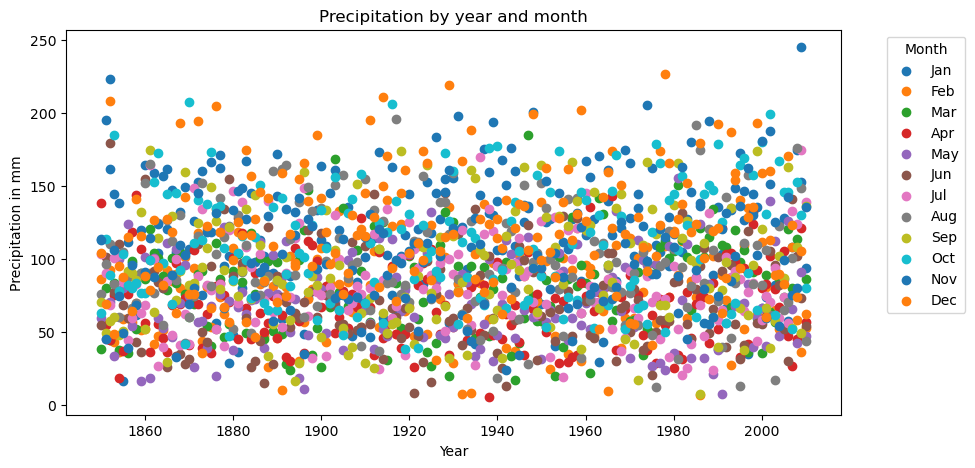

In [15]:
# Scatterplot for precipitation by year and month
plt.figure(figsize=(10, 5))
for col in rain_df.columns:   # This loop iterates through each column in the rain_df DataFrame
    plt.scatter(rain_df.index, rain_df[col], label=col)  # A scatter plot is created using years and precipitation values for that specific month

plt.xlabel("Year")
plt.ylabel("Precipitation in mm")
plt.title("Precipitation by year and month")
plt.legend(title="Month", bbox_to_anchor=(1.05, 1), loc="upper left")  # [10]
plt.show()

The visualization shows that rainfall is concentrated in the mean values between 100 and 50 and with rainfall reaching the value of 200 and belonging specifically to the months of February and December.  
The scatterplot contains too many points and it is difficult to draw any additional conclusions.  
For this purpose, we can use several features of pandas and matplotlib to extract new data and conclusions to help us understand this dataset.

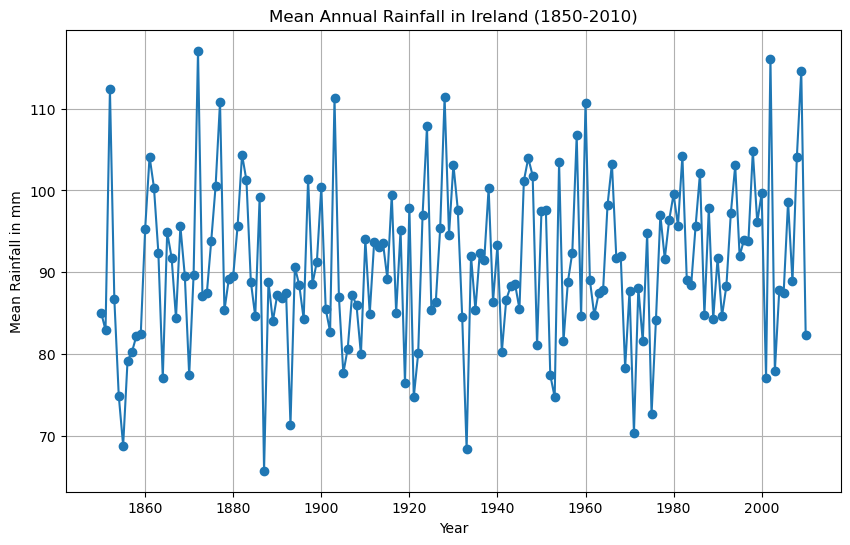

In [16]:
# Calculate the mean rainfall per year
rain_df["Mean_annual"] = rain_df.loc[:, "Jan":"Dec"].mean(axis=1)

# Reset the index to ensure "Year" becomes a column and is not the index [11]
rain_df.reset_index(inplace=True)

# Create a new DataFrame with year and mean rainfall
mean_annual_df = rain_df[["Year", "Mean_annual"]]

# Plot the mean rainfall per year
plt.figure(figsize=(10, 6))
plt.plot(mean_annual_df["Year"], mean_annual_df["Mean_annual"], marker="o", linestyle="-")
plt.title("Mean Annual Rainfall in Ireland (1850-2010)")
plt.xlabel("Year")
plt.ylabel("Mean Rainfall in mm")
plt.grid(True)
plt.show()

This graph provides a visual representation of how mean annual precipitation has varied over time in Ireland.  
The values seem to be concentrated between 100 and 80 mm.  
To find the mean:

In [17]:
mean_precipitation = mean_annual_df["Mean_annual"].mean()
mean_precipitation_int = int(mean_precipitation)

print("The mean annual precipitation in Ireland (1850-2010) is:", mean_precipitation_int, "mm")

The mean annual precipitation in Ireland (1850-2010) is: 90 mm


### Predict global temperature and CO2 levels

We have seen above that with the Jozuel temperature databases and the CO2 data from the IPCC Report, CO2 has skyrocketed after the appearance of humans, and that the temperature has remained slightly constant for 80,000 years.

However, to understand the more immediate and imminent effect of human activity and its influence on the planet, more current and therefore more reliable and accurate data is needed to see this situation.  

To this end, using NASA data since 1958, we will again compare co2 and global temperature, their trend and also predict the global temperature anomaly in the coming decades.

This csv file contains 2 data sources:
Temperature and CO2
1) Temperature has 2 variables, year and the annual anomaly in farenheit, both from 1880 to 2023. 
2) CO2 has 3 variables: year , co2 and seasonally adjusted co2, measured in ppmv.

First, see the CO2 data.

In [18]:
# Read CO2 data from NASA db
nasa_file_path = r"data\NASA db temperature and co2.xlsx"
nasa_co2_df = pd.read_excel(nasa_file_path,sheet_name=1)  
nasa_co2_df.head()

,year,co2 average,de-season co2 average
0,1958,315.70,314.43
1,1959,315.58,315.55
2,1960,316.43,316.40
3,1961,316.89,316.86
4,1962,317.94,317.91


As early as 1958, it can be seen that the ppmv level is 315, when CO2 data from IPCC Report indicate that 80,000 years ago it was approximately 220.

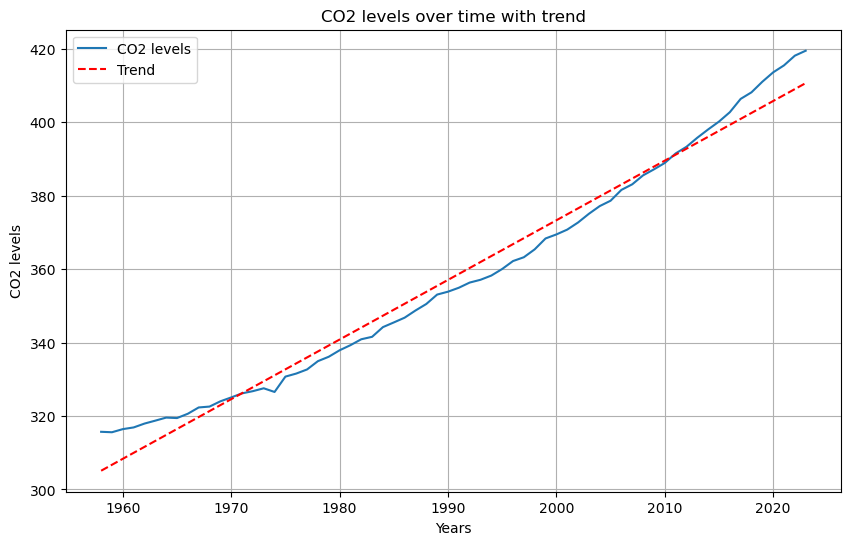

In [19]:
# Fitting of a linear trend line 
coefficients = np.polyfit(nasa_co2_df["year"], nasa_co2_df["co2 average"], 1)
trend = np.poly1d(coefficients)

# Plot co2 from 1958 to 2022
plt.figure(figsize=(10, 6))
plt.plot(nasa_co2_df["year"], nasa_co2_df["co2 average"], label="CO2 levels")
plt.plot(nasa_co2_df["year"], trend(nasa_co2_df["year"]), label="Trend", linestyle="--", color="red")
plt.title("CO2 levels over time with trend")
plt.xlabel("Years")
plt.ylabel("CO2 levels")
plt.grid(True)
plt.legend()
plt.show()


The graph clearly shows that there is a sustained growth in ppmv levels, as seen in the graph prepared with the IPCC Report data.  
Now see the temperature variation:

In [20]:
# Read temperature data from NASA db from 1880 to 2022
nasa_file_path = r"data\NASA db temperature and co2.xlsx"
nasa_temp_df = pd.read_excel(nasa_file_path,sheet_name=2)  
nasa_temp_df.head()

,year,temperature anomaly
0,1880,-0.170
1,1881,-0.090
2,1882,-0.011
3,1883,-0.018
4,1884,-0.280


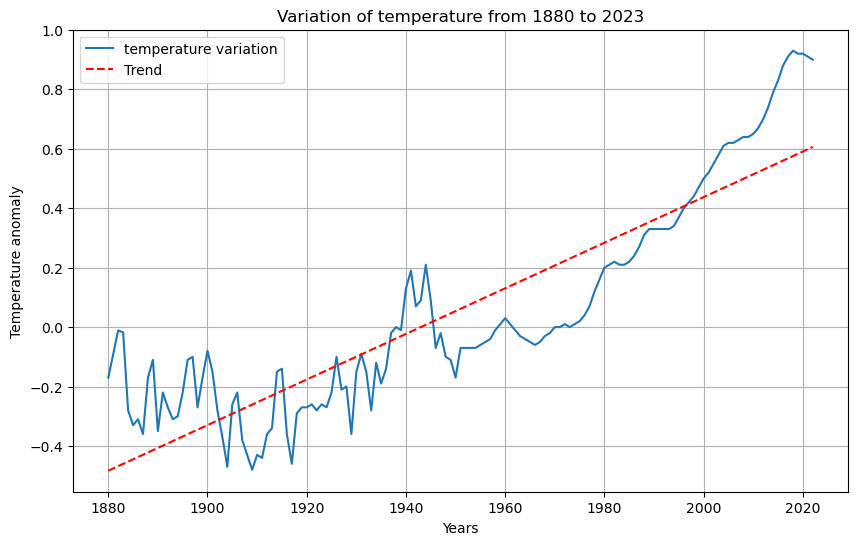

In [21]:
# Fitting of a linear trend line 
coefficients = np.polyfit(nasa_temp_df["year"], nasa_temp_df["temperature anomaly"], 1)
trend = np.poly1d(coefficients)

# Plot temperature anomality from 1880 to 2022
plt.figure(figsize=(10, 6))
plt.plot(nasa_temp_df["year"], nasa_temp_df["temperature anomaly"], label="temperature variation")
plt.plot(nasa_temp_df["year"], trend(nasa_temp_df["year"]), label="Trend", linestyle="--", color="red")
plt.title("Variation of temperature from 1880 to 2023")
plt.xlabel("Years")
plt.ylabel("Temperature anomaly")
plt.grid(True)
plt.legend()
plt.show()

The temperature variation has been positive during the whole period analyzed.  
We can try to see the influence it has between this temperature variation and the increase in CO2 levels.  

In [22]:
print(len(nasa_co2_df["co2 average"]))
print(len(nasa_temp_df["temperature anomaly"]))

66
143


Len() indicates that the length is at least twice as long.  
The co2 data start from 1958 while the temperature data are from 1880, so to compare the two, extract a new temperature dataframe starting in 1958 is more accurate.

In [23]:
# Read temperature data from NASA db from 1958 to 2022
nasa_file_path = r"data\NASA db temperature and co2.xlsx"
nasa_temp1958_df = pd.read_excel(nasa_file_path,sheet_name=2,skiprows=80 )
nasa_temp1958_df.columns = ["year", "temperature anomaly"]  
nasa_temp1958_df.head()

,year,temperature anomaly
0,1960,0.03
1,1961,0.01
2,1962,-0.01
3,1963,-0.03
4,1964,-0.04


In [24]:
print(len(nasa_temp1958_df["temperature anomaly"]))
print(len(nasa_co2_df["co2 average"]))

63
66


Now the data have a very similar length, however it does not allow to make a comparation between variables with different lengths, for this we can use a pandas utility called merge and then filling the missing values by interpolation.

In [25]:
# Merge the DataFrames according to dates [12]
merged_df = pd.merge(nasa_co2_df, nasa_temp1958_df, on="year", how="outer")

# Fill missing values using linear interpolation [13]
merged_df["co2 average"].interpolate(method="linear", inplace=True)
merged_df["temperature anomaly"].interpolate(method="linear", inplace=True)

Now that they possess the same length, a heatmap between the 2 variables can be created.  
A heat map is a visual representation that uses colors to show the relationship or correlation between multiple variables in the form of a matrix.  
Warmer colors (such as red) indicate a stronger positive correlation, while cooler colors (such as blue) indicate a stronger negative correlation.

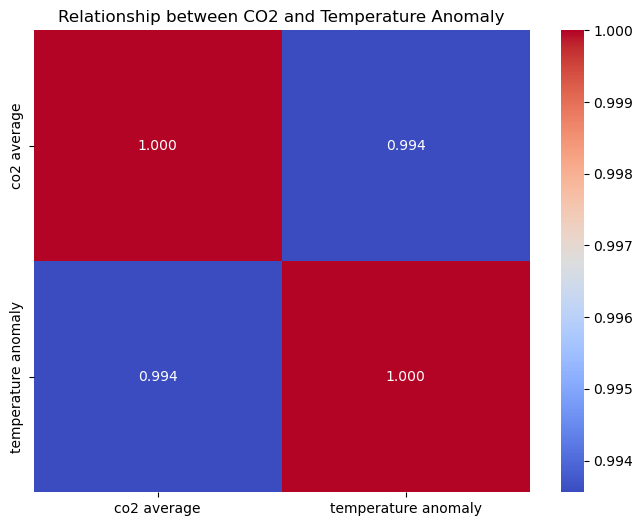

In [26]:
# Create a DataFrame with only the two columns of interest
data_for_heatmap = merged_df[["co2 average", "temperature anomaly"]]

# Calculate the correlation matrix (optional, but useful for heatmap colors).
correlation_matrix = data_for_heatmap.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f")
heatmap.set_title("Relationship between CO2 and Temperature Anomaly")
plt.show()

***

## References

[1] Lüthi, D., Le Floch, M., Bereiter, B., Blunier, T., Barnola, J.-M., Siegenthaler, U., Raynaud, D., Jouzel, J., Fischer, H., Kawamura, K.,        Stocker, T.F., 2008. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382  
https://www.nature.com/articles/nature06949

[2] WWF, WWf authors. https://wwf.panda.org/es/cambio_climatico1/importanciaclimatica/  

[3] Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA, https://doi.pangaea.de/10.1594/PANGAEA.683655  

[4] Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.  

[5] Pandas developers. pandas.read_excel https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html  

[6] Numpy developers. Trend line. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html  

[7] Stackoverflow .How to invert the x or y axis  https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis   

[8] L. Bazin, A. Landais, B. Lemieux-Dudon, H. Toyé Mahamadou Kele, D. Veres, F. Parrenin, P. Martinerie, C. Ritz, E. Capron, V. Lipenkov, M.-F. Loutre, D. Raynaud, B. Vinther, A. Svensson, S.O. Rasmussen, M. Severi, T. Blunier, M. Leuenberger, H. Fischer, V. Masson-Delmotte, J. Chappellaz, and E.Wolff. 2013. An optimized multi-proxy, multi-site Antarctic ice and gas orbital chronology (AICC2012): 120-800 ka. Climate of the Past, Vol. 9, Issue 4, pp. 1715-1731. DOI: 10.5194/cp-9-1715-2013 . AICC2012 800KYr Antarctic Ice Core Chronology https://www.ncei.noaa.gov/access/paleo-searchstudy/search.json?dataPublisher=NOAA&dataTypeId=7&headersOnly=true  

[9] S. Noone, C. Murphy, J. Coll, T. Matthews, D. Mullan, R. L. Wilby, S. Walsh  
 Homogenization and analysis of an expanded long-term monthly rainfall network for the Island of Ireland (1850–2010)   https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/joc.4522  

[10] Matplotlib.Legend guide.  https://matplotlib.org/stable/users/explain/axes/legend_guide.html
 
[11] Pandas. pandas.DataFrame.reset_index  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html 

[12] Pandas

[13] Pandas